<a href="https://colab.research.google.com/github/ianguidini/classif_arroz/blob/main/Classif_doencas_folha_arroz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Para aumentar a velocidade do programa, encontre **Runtime** na barra de ferramentas. Clique em **Change Runtime** e escolha **GPU**

# 🢃 Processar imagens

2.3.0
['DSC_0367.JPG', 'DSC_0386.JPG', 'DSC_0390.JPG', 'DSC_0379.JPG', 'DSC_0396.JPG', 'DSC_0381.JPG', 'DSC_0402.JPG', 'DSC_0374.JPG', 'DSC_0400.JPG', 'DSC_0376.JPG']
['DSC_0111.jpg', 'DSC_0296.jpg', 'DSC_0300.JPG', 'DSC_0101.jpg', 'DSC_0121.jpg', 'DSC_0391.jpg', 'DSC_0116.jpg', 'DSC_0119.jpg', 'DSC_0114.jpg', 'DSC_0104.jpg']


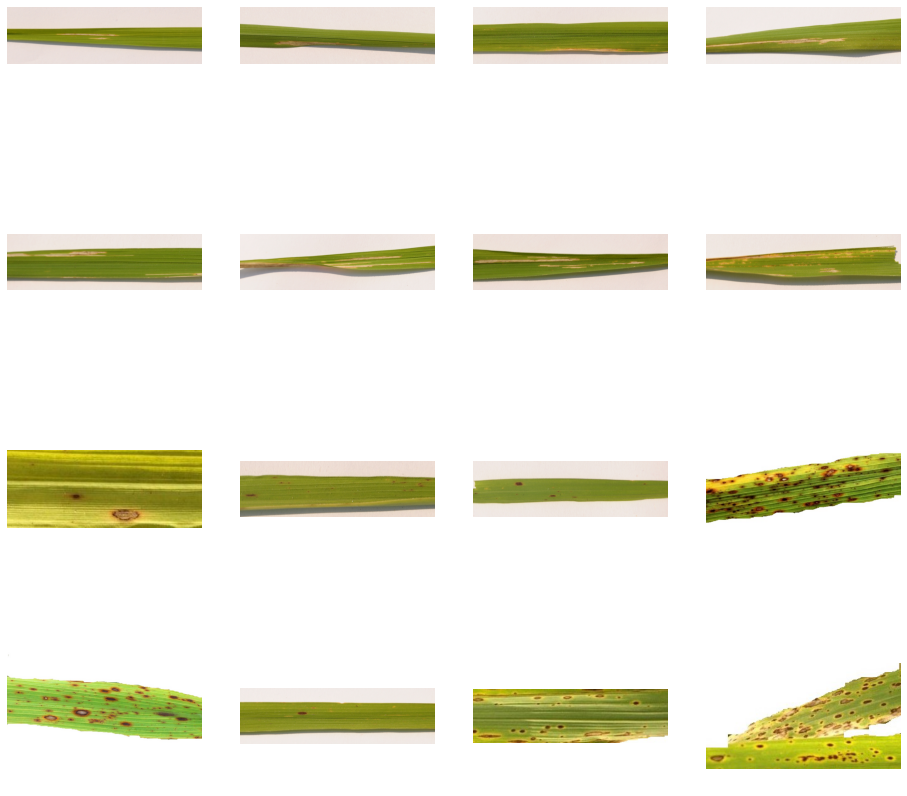

Found 120 images belonging to 4 classes.


In [ ]:
#@title Aperte o botão de play para processar imagens do dataset {display-mode: "form"}
import collections
import glob
from google.colab import drive

!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00486/rice_leaf_diseases.zip -O /tmp/rice_leaf_diseases.zip

import os
import zipfile
import tensorflow as tf
print(tf.__version__)

local_zip = '/tmp/rice_leaf_diseases.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


train_blb_dir = os.path.join('/tmp/Bacterial leaf blight/')

train_bs_dir = os.path.join('/tmp/Brown spot/')

train_ls_dir = os.path.join('/tmp/Leaf smut/')



train_blb_names = os.listdir(train_blb_dir)
print(train_blb_names[:10])

train_bs_names = os.listdir(train_bs_dir)
print(train_bs_names[:10])

tgt_size = 300

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_blb_pix = [os.path.join(train_blb_dir, fname) 
                for fname in train_blb_names[pic_index-8:pic_index]]
next_bs_pix = [os.path.join(train_bs_dir, fname) 
                for fname in train_bs_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_blb_pix+next_bs_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(tgt_size, tgt_size, 3)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])


#model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp',
        target_size=(tgt_size, tgt_size),
        class_mode='categorical')



# 🢃 Treinar o algoritmo

In [ ]:
#@title Aperte o botão de play para iniciar a rede neural {display-mode: "form"}
#@title {display-mode: "form"}

model.fit(train_generator, epochs=15, verbose=1)


Epoch 1/15
4/4 [==============================] - 3s 662ms/step - loss: 3.1290 - accuracy: 0.3333
Epoch 2/15
4/4 [==============================] - 3s 717ms/step - loss: 1.1673 - accuracy: 0.3917
Epoch 3/15
4/4 [==============================] - 3s 645ms/step - loss: 1.0949 - accuracy: 0.4917
Epoch 4/15
4/4 [==============================] - 3s 711ms/step - loss: 0.8665 - accuracy: 0.5750
Epoch 5/15
4/4 [==============================] - 2s 598ms/step - loss: 0.8549 - accuracy: 0.6083
Epoch 6/15
4/4 [==============================] - 3s 632ms/step - loss: 0.8404 - accuracy: 0.6500
Epoch 7/15
4/4 [==============================] - 3s 719ms/step - loss: 0.7252 - accuracy: 0.6833
Epoch 8/15
4/4 [==============================] - 3s 647ms/step - loss: 0.6976 - accuracy: 0.7083
Epoch 9/15
4/4 [==============================] - 3s 634ms/step - loss: 0.4744 - accuracy: 0.8417
Epoch 10/15
4/4 [==============================] - 3s 682ms/step - loss: 0.5188 - accuracy: 0.8333
Epoch 11/15
4/4 [==


# 🢃 Visualizar filtros desenvolvidos pelo modelo treinado

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


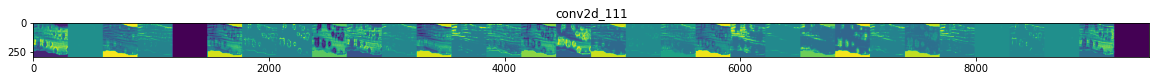

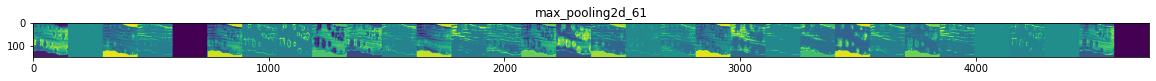

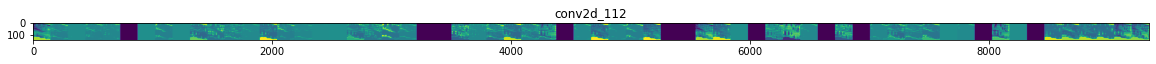

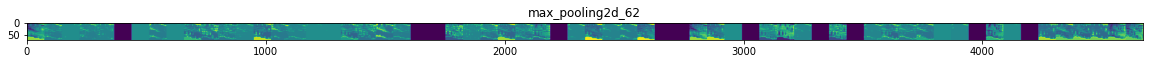

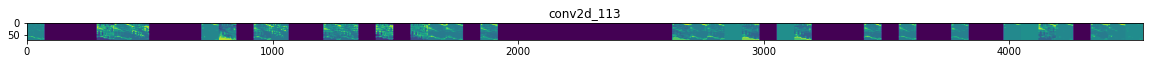

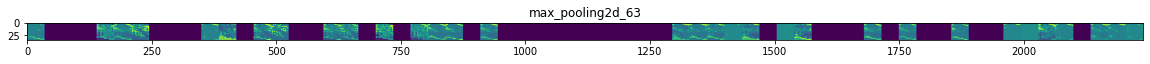

In [ ]:
#@title Aperte o botão de play para visualizar os filtros de cada camada da rede neural {display-mode: "form"}

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

blb_img_files = [os.path.join(train_blb_dir, f) for f in train_blb_names]
bs_img_files = [os.path.join(train_bs_dir, f) for f in train_bs_names]
img_path = random.choice(blb_img_files + bs_img_files)

img = load_img(img_path, target_size=(tgt_size, tgt_size))  # this is a PIL image
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]

    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):

      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

#  🢃 Fazer upload de nova imagem a ser testada

In [ ]:
#@title Após o treinamento, faça o upload da imagem a ser testada {display-mode: "form"}

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
 
  path='/content/' + fn
  img=image.load_img(path, target_size=(tgt_size, tgt_size))
  
  x=image.img_to_array(img)
  xx=x
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  imagesx = np.vstack([xx])
  
  classes = model.predict_classes(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0] == 0:
    print("Foi identificado Xanthomonas oryzae na imagem: " + fn)
    
  if classes[0] == 1:
    print("Foi identificado Cochliobolus miyabeanus na imagem: "+ fn)
    
  if classes[0] == 2:
    print("Foi identidicado Entyloma oryzae na imagem: " + fn)


Saving DSC_0119.jpg to DSC_0119 (10).jpg
1
Foi identificado Cochliobolus miyabeanus na imagem: DSC_0119.jpg


# Cadastrar nova imagem

In [ ]:
#@title 🢀 Realizar rotulamento {display-mode: "form"}

!pip install pigeon-jupyter -q

from pigeon import annotate
from IPython.display import display, Image
import numpy as np
import pandas as pd

from google.colab import files
from keras.preprocessing import image

tgt_size = 300

c_uploaded=files.upload()

imv = []
imx = []

for im in c_uploaded.keys():
  path='/content/' + im
  c_img = image.load_img(im, target_size=(tgt_size, tgt_size))
  
  tx = image.img_to_array(c_img)
  tx = tx.ravel()
  imx.append((tx))
  
  imv.append(im)

rotulamentos = annotate(
  imv,
  options=['Xanthomonas oryzae', 'Cochliobolus miyabeanus', 'Entyloma oryzae'],
  display_fn=lambda filename: display(Image(filename, width=300, height=300))
)


Saving DSC_0119.jpg to DSC_0119 (11).jpg
Saving DSC_0503.jpg to DSC_0503 (7).jpg
Saving DSC_0516.jpg to DSC_0516 (5).jpg
Saving DSC_0702.jpg to DSC_0702 (5).jpg


HTML(value='0 examples annotated, 5 examples left')

Output()

Annotation done.


In [ ]:
#@title 🢀 Enviar e consultar seus arquivos cadastrados {display-mode: "form"}
#%load_ext google.colab.data_table

import sqlite3 as s3

dbo = pd.DataFrame(rotulamentos, columns = ['Arquivo', 'Categoria'])

dbu = pd.DataFrame({'array':[imx[0]]})
for i in range(len(imx)-1):
  dbu.loc[i+1] = [imx[i]]

dbu['Arquivo'] = dbo['Arquivo']
dbu['Categoria'] = dbo['Categoria']


conn = s3.connect('teste1.db')

dbu.to_sql('test_table', conn, if_exists='replace')

dbu




,array,Arquivo,Categoria
0,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",DSC_0119.jpg,Cochliobolus miyabeanus
1,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",DSC_0503.jpg,Cochliobolus miyabeanus
2,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",DSC_0516.jpg,Cochliobolus miyabeanus
3,"[252.0, 254.0, 251.0, 252.0, 251.0, 255.0, 255...",DSC_0702.jpg,Cochliobolus miyabeanus
